<a href="https://colab.research.google.com/github/gomlfx/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/Mike_Smith_LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [2]:
df = df.drop('diagnosis', axis=1)
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#delete the last column, metrics can't use it
df = df.iloc[:, :-1]
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [0]:
# Perform K-Means Clustering on the Dataset 

In [0]:
#use this as the features.
features = ['radius_mean', 'texture_mean']

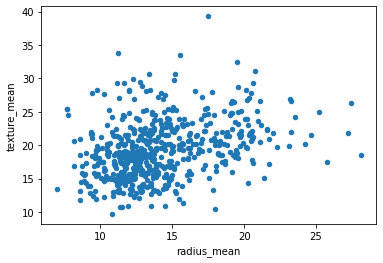

In [6]:
#plot them to see how they look.
df[features].plot(kind='scatter', x=features[0], y=features[1])

In [0]:
#Initialize an instance of the KMeans class from sklearn.
model = KMeans(n_clusters=3)

In [8]:
#Fit the instantiated model to our sliced dataframe
model.fit(df[features].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
#Assign clusters back to our dataframe
df['cluster']=model.labels_

In [10]:
#get our centroids
centroids = model.cluster_centers_
centroids

array([[12.36637377, 16.31327869],
       [13.11225926, 23.90814815],
       [19.35294574, 21.49348837]])

In [0]:
#turn them into a dataframe
cc = pd.DataFrame(centroids)

In [0]:
#set up some colors for plotting
base_colors = ['r','g','b']
colors = [base_colors[centroid] for centroid in model.labels_]

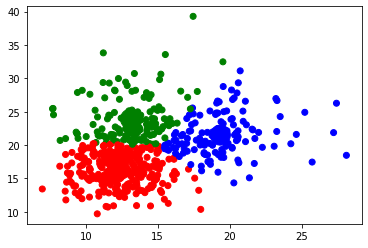

In [13]:
#plot the scatter of our points with calculated centroids
plt.scatter(df[features[0]], df[features[1]], c=colors)
plt.scatter(cc[0], cc[1], c=base_colors, s=400);

In [14]:
#what's our silhouette score?
from sklearn import metrics
metrics.silhouette_score(df, model.labels_, metric='euclidean')

0.0048759240195756556

In [15]:
#what's the predicted centroid for each data point?
model.labels_

array([0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 0,
       0, 2, 2, 0, 1, 2, 1, 0, 2, 0, 2, 2, 0, 2, 1, 0, 1, 1, 1, 1, 2, 1,
       1, 2, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 1, 2,
       1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 2, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2,
       2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 0, 2, 2, 2, 0, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 2,
       2, 1, 0, 2, 2, 1, 0, 0, 0, 2, 1, 0, 2, 0, 2, 2, 1, 0, 0, 0, 2, 1,
       0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 2, 1, 1, 2, 0, 1, 2, 2, 1, 1, 0, 0,
       0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 1, 2, 2, 2, 2,
       2, 2, 0, 1, 0, 1, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [0]:
# Your Code Here

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [17]:
##### Your Code Here #####
features = list(df.columns)
features

['id',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'cluster']

In [0]:
#standardize before PCA!
#instantiate sklearn class for standardization
scaler = StandardScaler()

In [0]:
#standardize the dataset
scaled_data = scaler.fit_transform(df)

In [20]:
scaled_data[:5]
#now it's a numpy array, not a dataframe

array([[-2.36405166e-01,  1.09706398e+00, -2.07333501e+00,
         1.26993369e+00,  9.84374905e-01,  1.56846633e+00,
         3.28351467e+00,  2.65287398e+00,  2.53247522e+00,
         2.21751501e+00,  2.25574689e+00,  2.48973393e+00,
        -5.65265059e-01,  2.83303087e+00,  2.48757756e+00,
        -2.14001647e-01,  1.31686157e+00,  7.24026158e-01,
         6.60819941e-01,  1.14875667e+00,  9.07083081e-01,
         1.88668963e+00, -1.35929347e+00,  2.30360062e+00,
         2.00123749e+00,  1.30768627e+00,  2.61666502e+00,
         2.10952635e+00,  2.29607613e+00,  2.75062224e+00,
         1.93701461e+00, -8.45660092e-01],
       [-2.36403445e-01,  1.82982061e+00, -3.53632408e-01,
         1.68595471e+00,  1.90870825e+00, -8.26962447e-01,
        -4.87071673e-01, -2.38458552e-02,  5.48144156e-01,
         1.39236330e-03, -8.68652457e-01,  4.99254601e-01,
        -8.76243603e-01,  2.63326966e-01,  7.42401948e-01,
        -6.05350847e-01, -6.92926270e-01, -4.40780058e-01,
         2.60

In [21]:
#turn it back into a dataframe
df_scaled = pd.DataFrame(scaled_data, columns = features)
df_scaled.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,cluster
0,-0.236405,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,-0.845660
1,-0.236403,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1.603096
2,0.431741,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1.603096
3,0.432121,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,0.378718
4,0.432201,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1.603096


In [22]:
#so did that work? the mean should be 0:
df_scaled.mean()

id                         8.877882e-18
radius_mean               -1.256562e-16
texture_mean               1.049736e-16
perimeter_mean            -1.272171e-16
area_mean                 -1.900452e-16
smoothness_mean            1.490704e-16
compactness_mean           2.544342e-16
concavity_mean            -1.338511e-16
concave points_mean       -8.429110e-17
symmetry_mean              2.081912e-16
fractal_dimension_mean     5.408679e-16
radius_se                  2.475807e-16
texture_se                -9.912009e-17
perimeter_se              -2.968237e-16
area_se                   -1.088760e-16
smoothness_se              4.426014e-16
compactness_se             1.958988e-16
concavity_se               1.678017e-16
concave points_se          2.185325e-17
symmetry_se                1.523874e-16
fractal_dimension_se      -5.658430e-17
radius_worst              -7.988142e-16
texture_worst             -1.834112e-17
perimeter_worst           -4.015534e-16
area_worst                -2.848727e-17


In [23]:
#std should be 1:
df_scaled.std()

id                         1.00088
radius_mean                1.00088
texture_mean               1.00088
perimeter_mean             1.00088
area_mean                  1.00088
smoothness_mean            1.00088
compactness_mean           1.00088
concavity_mean             1.00088
concave points_mean        1.00088
symmetry_mean              1.00088
fractal_dimension_mean     1.00088
radius_se                  1.00088
texture_se                 1.00088
perimeter_se               1.00088
area_se                    1.00088
smoothness_se              1.00088
compactness_se             1.00088
concavity_se               1.00088
concave points_se          1.00088
symmetry_se                1.00088
fractal_dimension_se       1.00088
radius_worst               1.00088
texture_worst              1.00088
perimeter_worst            1.00088
area_worst                 1.00088
smoothness_worst           1.00088
compactness_worst          1.00088
concavity_worst            1.00088
concave points_worst

In [0]:
#import and instantiate the PCA class
pca = PCA(n_components = 2)

In [25]:
#apply PCA to the data
pca_features = pca.fit_transform(df_scaled)
pca_features[:5]

array([[ 8.78303071,  2.57488862],
       [ 2.71051549, -3.80915756],
       [ 5.95657708, -1.01053568],
       [ 6.86251272, 10.4459402 ],
       [ 4.19998979, -1.94199567]])

In [26]:
#how much variation did each principal component explain?
pca.explained_variance_ratio_

array([0.43027486, 0.18174341])

In [27]:
#how much total variance did we explain?
sum(pca.explained_variance_ratio_)

0.6120182637968109

In [28]:
#how much information did we lose? 
1-sum(pca.explained_variance_ratio_)

0.3879817362031891

In [36]:
#turn that into a DataFrame
df_pca = pd.DataFrame(pca_features, columns = ['comp_1', 'comp_2'])
print(df.shape)
print(df.dtypes)
df_pca.head()


(569, 32)
id                           int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave po

,comp_1,comp_2
0,8.783031,2.574889
1,2.710515,-3.809158
2,5.956577,-1.010536
3,6.862513,10.445940
4,4.199990,-1.941996


In [0]:
#initialize an instance of the kmeans class from sklearn
k = 3
model = KMeans(n_clusters = 3, max_iter=1) #number of clusters independent of number of columns, not true at dimenisonality reduction.

In [71]:
#fit the instantiated modelto our sliced dataframe
model.fit(df_pca.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
#assign predicted clusters back to dataframe
df_pca['cluster'] = model.labels_

In [0]:
#get our centroids
centroids = model.cluster_centers_

In [77]:
#turn them into a dataframe
cc = pd.DataFrame(centroids)
cc.head()

,0,1,2
0,-2.683965,-0.469524,0.996711
1,5.769528,-1.598616,0.128440
2,1.199018,2.031951,1.461538


In [0]:
#set up some colors for plotting
base_colors = ['r','g','b']
colors = [base_colors[centroid] for centroid in model.labels_]

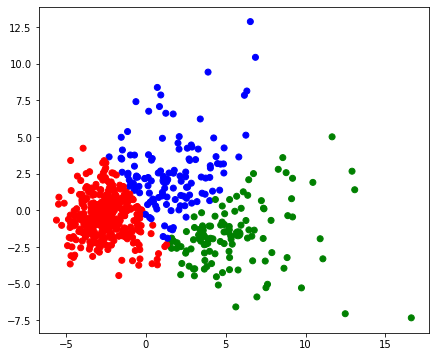

In [76]:
#plot the scatter of our points with calculated centroids
fig, ax = plt.subplots(figsize=(7,6))
ax.scatter(df_pca['comp_1'], df_pca['comp_2'],c=colors)
ax.scatter(cc[0], cc[1], c=base_colors, s=100);

In [78]:
#what's our silhouette scores?
metrics.silhouette_score(df, model.labels_, metric = 'euclidean')

-0.05457832293679181

In [80]:
#what's the predicted centroid for each data point?
model.labels_

array([1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 0, 0,
       2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 0, 0, 2, 0, 2, 1, 2,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 1, 2, 1, 0, 0, 1, 2, 1, 1, 0, 0, 2, 1, 1, 0, 1, 2, 1,
       0, 2, 0, 2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0,
       0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 2,
       2, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0,
       0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0,
       2, 2, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 1,
       1, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 2, 2, 2, 2, 0, 1, 1,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project